In [23]:
// package main

import (
	"bytes"
	"fmt"
	"log"
	"os/exec"
	"strings"
    "container/list"
)

var x list.List
x.PushBack([]string{"go", "get", "gonum.org/v1/plot/..."})
// x.PushBack([]string{"go", "isntall", "gonum.org/v1/plot/..."})

for e := x.Front(); e != nil; e=e.Next() {
    val := e.Value.([]string)
    fmt.Println(val[0])
    fmt.Println(val[1:])
    cmd := exec.Command(val[0], val[1:]...)
	var out bytes.Buffer
    var stdErr bytes.Buffer
	cmd.Stdout = &out
    cmd.Stderr = &stdErr
	err := cmd.Run()
	if err != nil {
        fmt.Println("err", err, stdErr.String())
	}
	fmt.Println("out", out.String())
}

go
[get github.com/gonum/plot/...]
err exit status 1 package github.com/gonum/plot: code in directory /go/src/github.com/gonum/plot expects import "gonum.org/v1/plot"
package github.com/gonum/plot/gob: code in directory /go/src/github.com/gonum/plot/gob expects import "gonum.org/v1/plot/gob"
package github.com/gonum/plot/internal/cmpimg: code in directory /go/src/github.com/gonum/plot/internal/cmpimg expects import "gonum.org/v1/plot/internal/cmpimg"
package github.com/gonum/plot/palette: code in directory /go/src/github.com/gonum/plot/palette expects import "gonum.org/v1/plot/palette"
package github.com/gonum/plot/palette/brewer: code in directory /go/src/github.com/gonum/plot/palette/brewer expects import "gonum.org/v1/plot/palette/brewer"
package github.com/gonum/plot/palette/moreland: code in directory /go/src/github.com/gonum/plot/palette/moreland expects import "gonum.org/v1/plot/palette/moreland"
package github.com/gonum/plot/plotter: code in directory /go/src/github.com/gonum/p

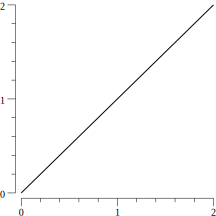

In [32]:

import (
	"os"
    "io/ioutil"
	"gonum.org/v1/plot"
	"gonum.org/v1/plot/plotter"
	"gonum.org/v1/plot/vg"    
	"gonum.org/v1/plot/vg/draw"
	"gonum.org/v1/plot/vg/vgsvg"
)


	p, err := plot.New()
	if err != nil {
		panic(err)
	}
	l, err := plotter.NewLine(plotter.XYs{{0, 0}, {1, 1}, {2, 2}})
	if err != nil {
		panic(err)
	}
	p.Add(l)

	// Create a Canvas for writing SVG images.
	c := vgsvg.New(3*vg.Inch, 3*vg.Inch)

	// Draw to the Canvas.
	p.Draw(draw.New(c))


w := bytes.Buffer{}

    c.WriteTo(&w)
display.SVG(w.String())